In [1]:
%matplotlib tk
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
sys.path.append('/home/jleland/Coding/Projects/flopter/')
import flopter.core.splopter as spl
import flopter.core.fitters as f
import flopter.core.constants as c
import flopter.core.normalisation as n
import flopter.classes.spicedata as sd
import flopter.analysis.spicerun as spr
import pathlib as pth

In [2]:
spl_t0_old = spl.Splopter('bin/data_local_m/', 'magnum/', 'fetail_T0_S1/', reduce_fl=True)
spl_t0 = spl.Splopter('bin/data_local_m/', 'magnum/', 'fetail_T0_S/', reduce_fl=True)
spl_t2 = spl.Splopter('bin/data_local_m/', 'magnum/', 'fetail_T2-5_S1/', reduce_fl=True)
spl_t10 = spl.Splopter('bin/data_local_m/', 'magnum/', 'fetail_T10_S1/', reduce_fl=True)

splopters = [spl_t0_old, spl_t0, spl_t2, spl_t10]

<class 'flopter.classes.spicedata.Spice2TData'>
['_ALL_CONV_TYPES', '_ALL_LABELS', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_convert', 'alphaxz', 'alphayz', 'bx', 'by', 'bz', 'converter', 'count', 'deallocate', 'deltah', 'denormalise', 'diaghistories', 'diagm', 'diagnostics', 'dphiqn', 'dt', 'dz', 'edgecharge', 'edges', 'equipotm', 'esct', 'escy', 'escz', 'flag', 'flagm', 'floatconstant', 'fvarrays', 'fvbin', 'fvlimits', 'fvperparraycount', 'has_converted', 'histlimits', 'hpos', 'injrate', 'irel', 'itertime_lower', 'itertime_upper', 'ksi', 'm', 'matlab_data', 'mksb', 'mksmainionm', 'mksmainionq', 'mksn0', 'mkspar1', 'mkspar2', 'mkspar3', 'mkste', 'mu', 'na', 'nc', 'nodiagreg', 'normalise

In [10]:
for splopter in splopters:
    splopter.prepare(homogenise=True, make_denormaliser=False)

Cannot homogenise, data has already been homogenised!


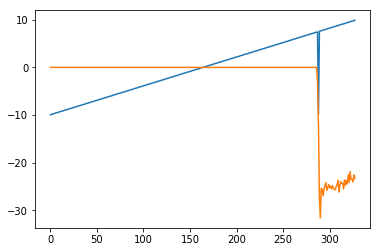

In [23]:
splopter = spl_t2

plt.figure()
plt.plot(splopter.iv_data['V'][:-1])
plt.plot(splopter.iv_data['I'][:-1])
# plt.plot(splopter.iv_data['V'], splopter.iv_data['I'])

# plt.ylim([-25,10])

plt.show()

In [26]:
# plt.figure()
# plt.contour(splopter.tdata.pot)

splopter.plot_2d_variable(plot_obj_fl=True, show_fl=True)

AttributeError: 'Spice2TData' object has no attribute 't_dict'

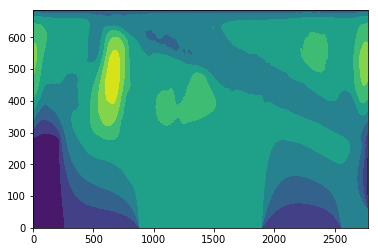

In [ ]:
plt.figure()
plt.imshow(splopter.tdata.pot)
plt.show()

In [16]:
t0_dir = pth.Path('/home/jleland/Spice/spice2/bin/data_local_m/magnum/fetail_T0_S/')
backup_lst = list(t0_dir.glob('backup*'))
backup_lst.append('.')
mat_files = []
for lnk in backup_lst:
    backup_dir = t0_dir / lnk
    t_file = list(backup_dir.glob('t-*[!0-9][!0-9].mat'))
    if len(t_file) > 0:
        mat_files.append(t_file[0])

plt.figure()
for i in range(len(mat_files)):
    mat_dict = sio.loadmat(str(mat_files[i]), variable_names=[sd.OBJECTSCURRENTE, sd.OBJECTSCURRENTI, sd.T])
    t = mat_dict[sd.T][:-1]
    e_current = mat_dict[sd.OBJECTSCURRENTE]
    i_current = mat_dict[sd.OBJECTSCURRENTI]
    tot_current = e_current[2] + e_current[3] + i_current[2] + i_current[3]
    print(f't: {t.shape}, I_e: {e_current.shape}, I_i: {i_current.shape}')
    plt.plot(t, tot_current != 0)
    plt.plot(t, tot_current != 0)

# for i in range(len(mat_files) - 1):
#     mat_dict = sio.loadmat(str(mat_files[i + 1]), variable_names=[sd.T, sd.OBJECTSCURRENTE, sd.OBJECTSCURRENTI])
#     print(f't: {mat_dict[sd.T][:-1].shape}, I_e: {mat_dict[sd.OBJECTSCURRENTE].shape}, I_i: {mat_dict[sd.OBJECTSCURRENTI].shape}')
#     # e_current += mat_dict[sd.OBJECTSCURRENTE]
#     # i_current += mat_dict[sd.OBJECTSCURRENTI]
# plt.ylim([-100, 100])
plt.show()

t: (1890, 1), I_e: (4, 1890), I_i: (4, 1890)
t: (1847, 1), I_e: (4, 1847), I_i: (4, 1847)
t: (1359, 1), I_e: (4, 1359), I_i: (4, 1359)
t: (1789, 1), I_e: (4, 1789), I_i: (4, 1789)
t: (1107, 1), I_e: (4, 1107), I_i: (4, 1107)
t: (1319, 1), I_e: (4, 1319), I_i: (4, 1319)
t: (1523, 1), I_e: (4, 1523), I_i: (4, 1523)
t: (1727, 1), I_e: (4, 1727), I_i: (4, 1727)
t: (1927, 1), I_e: (4, 1927), I_i: (4, 1927)
t: (1027, 1), I_e: (4, 1027), I_i: (4, 1027)
t: (1064, 1), I_e: (4, 1064), I_i: (4, 1064)
t: (1101, 1), I_e: (4, 1101), I_i: (4, 1101)
t: (1138, 1), I_e: (4, 1138), I_i: (4, 1138)
